In [1]:
import sys
#sys.path.append('\\paper_1_supply_chain_visibility')

import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.stats as st

from calculate_scv import calculate_supply_chain_visibility

import warnings
warnings.filterwarnings("ignore")

# Calculate Supply Chain Visibility
With 200 seeds

In [2]:
df_in = pd.read_csv(r"./data/20221005_GT_TimeSeries_ManufacturingTime2.5_Runtime364.csv")
df = df_in.set_index("Time")
df = df_in.set_index("Time")
df_truemodel = df.groupby(["Time"]).mean().iloc[:, 1:-1]
df_truemodel.iloc[0,0] = 0 #set only value of supplier on 0


names_supplychain = list(df_truemodel.columns)
levels = [1, 2, 2, 3, 4, 5, 5, 6, 7, 7, 7]


dimensions = ["missing", "noise", "bias"]
results_dim = {}

for dim in dimensions:
    results_dim[dim] = {}
    data_sparse_perc = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for perc in data_sparse_perc:
        seed_global_scv = []
        results = defaultdict()
        
        for i in range(1,201):
            global_scv, nodes = calculate_supply_chain_visibility(df_truemodel, perc, names_supplychain, levels, dim,
                                                                      seed=i)
            seed_global_scv.append(global_scv)
            results_seed = {"global_scv": global_scv,
                        "nodes": nodes}
            results[i] = results_seed
            seed_global_scv.append(global_scv)
        
        results["list_scv_per_seed"] = seed_global_scv
        results["mean_global_scv"] = np.mean(seed_global_scv)

        results_dim[dim][perc] = results
        print("Mean Global SCV", np.mean(seed_global_scv))

Mean Global SCV 100.0
Mean Global SCV 94.84127628783129
Mean Global SCV 89.47326007220582
Mean Global SCV 83.72135315813415
Mean Global SCV 77.52301406618406
Mean Global SCV 70.72941800519442
Mean Global SCV 63.19244828815171
Mean Global SCV 54.839861200477955
Mean Global SCV 44.876489592419624
Mean Global SCV 31.7033998227104
Mean Global SCV 100.0
Mean Global SCV 95.92527726225175
Mean Global SCV 91.65887910501696
Mean Global SCV 87.1857594237329
Mean Global SCV 82.41043764984984
Mean Global SCV 77.30382774938485
Mean Global SCV 71.81266033522955
Mean Global SCV 66.10086195347391
Mean Global SCV 59.857125180299114
Mean Global SCV 52.81813008730885
Mean Global SCV 100.0
Mean Global SCV 96.8080611250282
Mean Global SCV 93.39990352313175
Mean Global SCV 89.86691313282243
Mean Global SCV 86.31991013619415
Mean Global SCV 82.48891889709401
Mean Global SCV 78.49315322933771
Mean Global SCV 74.34259874635725
Mean Global SCV 69.76346607233519
Mean Global SCV 64.97433568300791


In [3]:
# name = results_dim["missing"][0.2][1]["nodes"][0].name
# quantity = results_dim["missing"][0.2][1]["nodes"][0].quantity
# quality = results_dim["missing"][0.2][1]["nodes"][0].quality

# print("Name", name, "Quantity", quantity, "Quality", quality)

Name Supplier Quantity 75.06849315068493 Quality 100


# Boxplot

In [4]:
from matplotlib.cbook import boxplot_stats

Missing          mean       iqr        cilo        cihi      whishi      whislo  \
0  100.000000  0.000000  100.000000  100.000000  100.000000  100.000000   
1   94.841276  0.777472   94.780134   94.902197   96.207910   93.433488   
2   89.473260  1.130157   89.383954   89.561389   91.615011   87.296329   
3   83.721353  1.438818   83.625649   83.851543   86.511994   81.204387   
4   77.523014  1.587597   77.525132   77.774385   80.339753   74.731475   
5   70.729418  1.973255   70.533894   70.843695   74.375729   68.066570   
6   63.192448  1.845643   63.105466   63.395232   66.558939   59.924951   
7   54.839861  2.060624   54.652556   54.976074   58.535263   51.136262   
8   44.876490  2.399360   44.704231   45.080930   49.282760   40.615791   
9   31.703400  2.380976   31.791013   32.164826   35.178819   27.160983   

                                              fliers          q1         med  \
0                                                 []  100.000000  100.000000   
1  [93

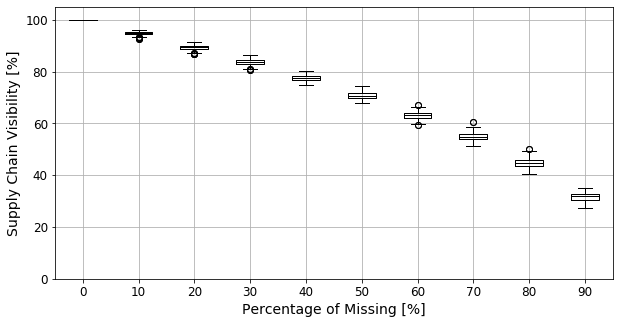

Noise          mean       iqr        cilo        cihi      whishi      whislo  \
0  100.000000  0.000000  100.000000  100.000000  100.000000  100.000000   
1   95.925277  1.148062   95.868991   96.049237   97.758448   93.860932   
2   91.658879  1.361458   91.588929   91.802678   94.099357   88.994503   
3   87.185759  2.074559   87.052958   87.378663   90.597755   83.488222   
4   82.410438  2.386632   82.403757   82.778458   86.619077   77.967958   
5   77.303828  2.490518   77.215234   77.606245   81.352620   72.786022   
6   71.812660  2.739224   71.673040   72.103098   76.077244   66.777602   
7   66.100862  2.808666   66.016698   66.457658   70.736723   60.566215   
8   59.857125  3.340733   59.734380   60.258875   66.392780   53.258053   
9   52.818130  4.255510   52.582851   53.250966   60.082299   46.033747   

                                              fliers          q1         med  \
0                                                 []  100.000000  100.000000   
1       

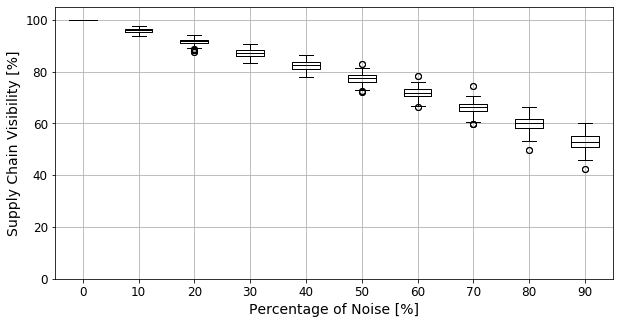

Bias          mean       iqr        cilo        cihi      whishi      whislo  \
0  100.000000  0.000000  100.000000  100.000000  100.000000  100.000000   
1   96.808061  0.486490   96.772838   96.849217   97.687716   95.850773   
2   93.399904  0.745003   93.379437   93.496402   94.644739   92.088867   
3   89.866913  0.912678   89.833440   89.976730   91.519192   88.090770   
4   86.319910  1.079253   86.203311   86.372754   88.489884   84.259284   
5   82.488919  1.444830   82.413121   82.639959   85.167334   79.711681   
6   78.493153  1.277445   78.428588   78.629147   80.564381   76.056066   
7   74.342599  1.759256   74.320988   74.597191   77.551372   71.020154   
8   69.763466  1.971784   69.614394   69.923964   73.464022   65.979166   
9   64.974336  2.337456   64.728716   65.095696   69.362935   60.611613   

                                              fliers          q1         med  \
0                                                 []  100.000000  100.000000   
1        

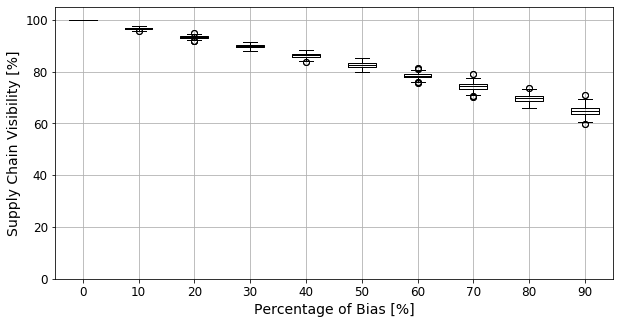

In [10]:
colors=["gray", "darkblue", "deepskyblue"]
data_sparse_perc = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
ticks = [1,2,3,4,5,6,7,8,9,10]
for (dim, sparse_dict), col in zip(results_dim.items(), colors):
#     mean = [np.mean(v["list_scv_per_seed"]) for k,v in sparse_dict.items()]
#     print("mean", dim.title(), mean)
    
#     median = [np.median(v["list_scv_per_seed"]) for k,v in sparse_dict.items()]
#     print("median", dim.title(), median)
    
    plt.figure(figsize=(10,5))
    plt.grid()
    
    outcome_seeds = [v["list_scv_per_seed"] for k,v in sparse_dict.items()]
    
    plt.title(dim.title(), fontsize = 18)
    #plt.boxplot(outcome_seeds, medianprops=dict(color=col))
    plt.boxplot(outcome_seeds, medianprops=dict(color="black")) #color = black
    stats = pd.DataFrame(boxplot_stats(outcome_seeds))
    stats["min_max"] = stats["whishi"] - stats["whislo"]
    stats["steps_decrease"] = stats["med"].shift(1) - stats["med"]
    stats["q3-q1"] = stats["q3"] - stats["q1"]
    print(dim.title(), stats)
    #plt.plot(list(range(1, len(median)+1)), median)
    
#     #Adds the scatter
#     for i in range(len(outcome_seeds)):
#         y_scatter = outcome_seeds[i]
#         x_scatter = np.random.normal(i + 1, 0.04, len(y_scatter))
#         plt.scatter(x_scatter, y_scatter, color=col, alpha=0.1)
    
#     plt.xlabel("Percentage of Data Sparseness [%]", fontsize = 14)
    plt.xlabel("Percentage of {0} [%]".format(dim.title()), fontsize = 14)
    plt.ylabel("Supply Chain Visibility [%]", fontsize = 14)
    plt.xticks(ticks, data_sparse_perc, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0,105))
    plt.show()

# Confidence interval

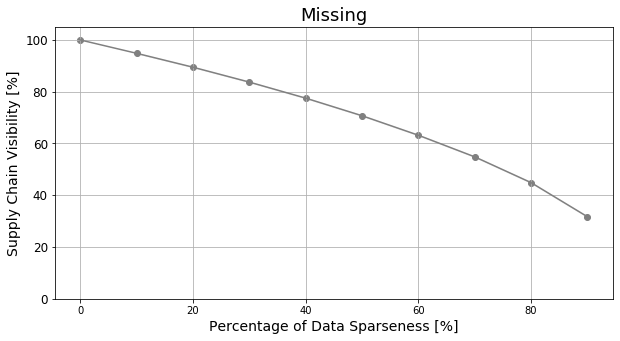

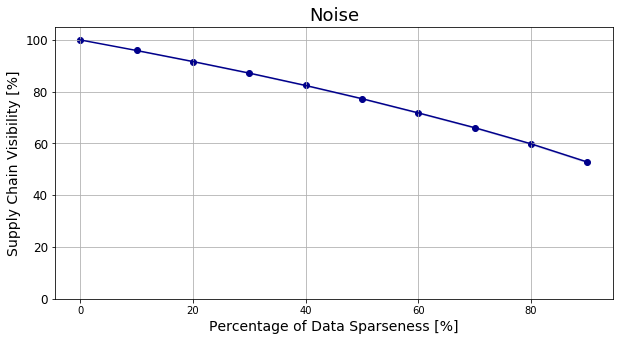

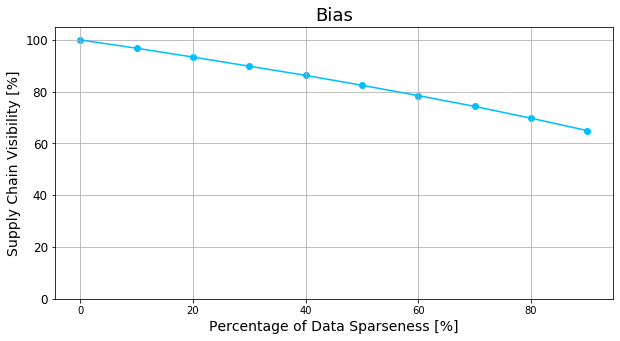

In [11]:
percentage = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
colors=["gray", "darkblue", "deepskyblue"]
for (dim, sparse_dict), col in zip(results_dim.items(), colors):
    mean = [np.mean(v["list_scv_per_seed"]) for k,v in sparse_dict.items()]
    
    plt.figure(figsize=(10,5))
    plt.grid()
    
    outcome_seeds = [v["list_scv_per_seed"] for k,v in sparse_dict.items()]
    
    plt.scatter(percentage, mean, color=col)
    plt.plot(percentage, mean, color=col)
    
    #Add confidence interval
    conf_seed = [st.t.interval(alpha=0.95, df=len(j)-1, loc=np.mean(j), scale=st.sem(j)) for j in outcome_seeds]
    min_interval = [interval[0] for interval in conf_seed]
    max_interval = [interval[1] for interval in conf_seed]
    plt.fill_between(percentage, min_interval, max_interval, color=col, alpha=0.1)
    
    plt.title(dim.title(), fontsize = 18)
    
    #plt.plot(list(range(1, len(median)+1)), median)
    
    
    plt.xlabel("Percentage of Data Sparseness [%]", fontsize = 14)
    plt.ylabel("Supply Chain Visibility [%]", fontsize = 14)
    plt.yticks(fontsize=12)
    plt.ylim((0,105))


# Comparison of the three dimensions

Missing [nan, 0.12072518150077372, 0.17494499948304565, 0.21560660127317988, 0.2399095793246886, 0.2679377650975425, 0.28627862040701757, 0.3026855490621898, 0.3261940061447035, 0.3427139217093469]
Noise [nan, 0.15730790071370393, 0.22948968029189132, 0.2794798565902852, 0.3239446937106152, 0.3553472506976618, 0.3932978072340063, 0.4605514961557162, 0.5270673239808588, 0.5996965957588998]
Bias [nan, 0.07421840915500866, 0.10437674043134848, 0.13081357099147795, 0.15637618953999777, 0.18714390955059912, 0.201632526990295, 0.27887146172605526, 0.2987284230794387, 0.3733254384560496]


Text(0.5, 1.0, 'Comparison of Noise, Bias, Missing Values')

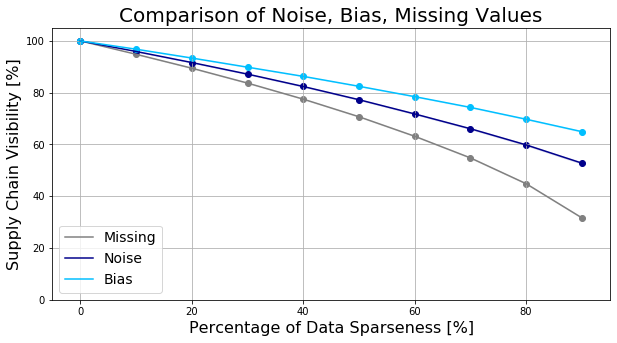

In [8]:
plt.figure(figsize=(10,5))
plt.grid()

data_sparse_perc = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
colors=["gray", "darkblue", "deepskyblue"]

dict_std = {}
dict_mean = {}
for (dim, sparse_dict), col in zip(results_dim.items(), colors): 
    mean = [np.mean(v["list_scv_per_seed"]) for k,v in sparse_dict.items()]
    dict_mean[dim] = mean
    
    plt.scatter(data_sparse_perc, mean, color=col)
    plt.plot(data_sparse_perc, mean, label=dim.title(), color=col)
    #plt.xticks(data_sparse_perc)
    
    outcome_seeds = [v["list_scv_per_seed"] for k,v in sparse_dict.items()]
    
    #Add confidence interval
    conf_seed = [st.t.interval(alpha=0.95, df=len(j)-1, loc=np.mean(j), scale=st.sem(j)) for j in outcome_seeds]
    min_interval = [interval[0] for interval in conf_seed]
    max_interval = [interval[1] for interval in conf_seed]
    print(dim.title(), [m-n for m,n in zip(max_interval, min_interval)])
    plt.fill_between(percentage, min_interval, max_interval, color=col, alpha=0.1)
    
    dict_std[dim] = [np.std(j) for j in outcome_seeds]
    
      
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14)
plt.legend(loc="lower left", fontsize=14)
plt.xlabel("Percentage of Data Sparseness [%]", fontsize = 16)
plt.ylabel("Supply Chain Visibility [%]", fontsize = 16)
plt.ylim((0,105))
plt.title("Comparison of Noise, Bias, Missing Values", fontsize = 20)

In [9]:
pd.DataFrame.from_dict(dict_mean)[["noise", "bias", "missing"]]

,noise,bias,missing
0,100.000000,100.000000,100.000000
1,95.925277,96.808061,94.841276
2,91.658879,93.399904,89.473260
3,87.185759,89.866913,83.721353
4,82.410438,86.319910,77.523014
5,77.303828,82.488919,70.729418
6,71.812660,78.493153,63.192448
7,66.100862,74.342599,54.839861
8,59.857125,69.763466,44.876490
9,52.818130,64.974336,31.703400


In [10]:
pd.DataFrame.from_dict(dict_std)[["noise", "bias", "missing"]]

,noise,bias,missing
0,0.000000,0.000000,0.000000
1,0.799171,0.377051,0.613320
2,1.165875,0.530265,0.888772
3,1.419840,0.664572,1.095345
4,1.645735,0.794437,1.218812
5,1.805269,0.950746,1.361203
6,1.998069,1.024353,1.454380
7,2.339738,1.416750,1.537732
8,2.677658,1.517629,1.657162
9,3.046636,1.896604,1.741088


# Zooming in on Quality and Quantity

In [13]:
names = [n.name for n in results_dim["missing"][0.2][1]["nodes"]]
quantity = [n.quantity for n in results_dim["missing"][0.2][1]["nodes"]]
quality = [n.quality for n in results_dim["missing"][0.2][1]["nodes"]]

In [14]:
dict_dim_perc_nodes = defaultdict()

#Restructure dictionary to dimension, percentage, node, list per seed
for dim, perc_dict in results_dim.items():
    dict_dim_perc_nodes[dim] = {}
    for perc, seed_dict in perc_dict.items():
        dict_nodes = defaultdict(list)
        dict_dim_perc_nodes[dim][perc] = dict_nodes
        
        for seed, results in seed_dict.items():
            try:
                all_nodes = results["nodes"]
                for i in range(len(all_nodes)):
                    dict_nodes[i].append(all_nodes[i])
            #for general keys
            except (TypeError, IndexError):
                continue
        
        

### Get quality and quantity per dimension

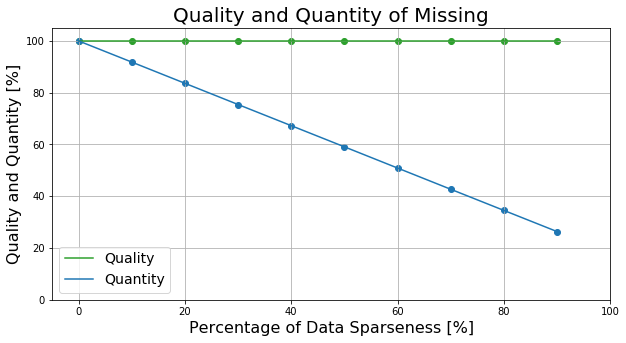

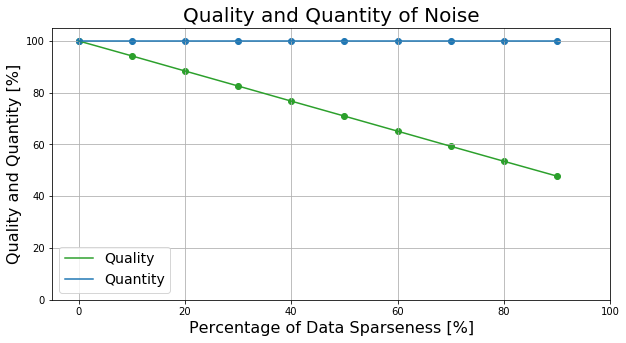

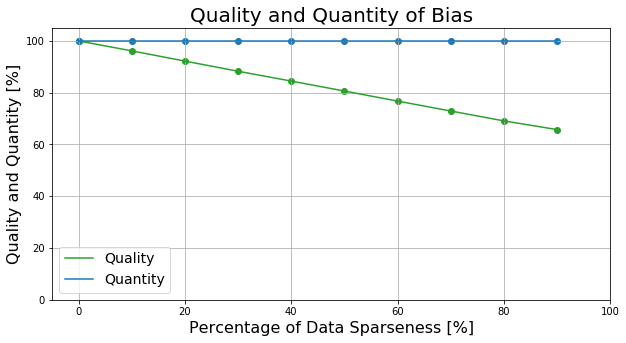

In [15]:
data_sparse_perc = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

for dim, percentages in dict_dim_perc_nodes.items():
    mean_quality = []
    mean_quantity = []
    for perc, nodes in percentages.items():
        all_quality = []
        all_quantity = []
        for node, all_nodes in nodes.items():
            quality_node = [max(0, i.quality) for i in all_nodes]
            all_quality.append(quality_node)

            quantity_node = [i.quantity for i in all_nodes]
            all_quantity.append(quantity_node)

        mean_quality_per = np.mean(all_quality)
        mean_quality.append(mean_quality_per)
    

        mean_quantity_per = np.mean(all_quantity)
        mean_quantity.append(mean_quantity_per)

    plt.figure(figsize=(10,5))
    plt.grid()
    
    plt.plot(data_sparse_perc, mean_quality, label="Quality", color="tab:green")
    plt.plot(data_sparse_perc, mean_quantity, label="Quantity", color="tab:blue")

    plt.scatter(data_sparse_perc, mean_quality, color="tab:green")
    plt.scatter(data_sparse_perc, mean_quantity, color="tab:blue")

    plt.legend(loc="lower left", fontsize=14)
    plt.xlabel("Percentage of Data Sparseness [%]", fontsize = 16)
    plt.ylabel("Quality and Quantity [%]", fontsize = 16)
    plt.ylim((0,105))
    plt.xlim((-5,100))
    plt.title("Quality and Quantity of " + dim.title(), fontsize = 20)
    plt.show()
    
    

# Supply Chain Visibility per Actor

In [17]:
dim_perc_node_scv = {}
for dim, percentages in dict_dim_perc_nodes.items():
    perc_node_scv = {}
    for perc, nodes in percentages.items():
        node_scv = {}
        for node, all_nodes in nodes.items():
            name = all_nodes[0].name
            node_scv[name] = [max(0, i.scv) for i in all_nodes]
        perc_node_scv[perc] = node_scv
    dim_perc_node_scv[dim] = perc_node_scv

In [18]:
#restructure dictionary
dim_node_perc = {}
for dim, percentages in dim_perc_node_scv.items():
    node_perc = defaultdict(dict)
    for perc, nodes in percentages.items():
        for name, nodes in nodes.items():
            perc_list = []
            perc_list.append(nodes)
            node_perc[name][perc] = perc_list
    dim_node_perc[dim] = node_perc


Missing Supplier [100.0, 94.8507086750978, 89.29342638962135, 83.56440669677824, 77.38296092628062, 70.65264696763158, 63.199312423900686, 54.808262792406815, 44.705124402740715, 31.43273330042854]
Missing Supplier mean [nan, 0.21716061700260525, 0.3238189516852401, 0.4011146155520464, 0.4475225468283668, 0.5057145265699887, 0.5444293450747892, 0.61388887761224, 0.6086507088358957, 0.6501544225387832]
Missing Manufacturer [100.0, 94.82883364616731, 89.30023499839321, 83.52667475187594, 77.32222674401989, 70.6849121816538, 63.09815478563169, 54.477858235944005, 44.642470304447436, 31.38365959982399]
Missing Manufacturer mean [nan, 0.24691227530280457, 0.2911448322897172, 0.35920633434966476, 0.4303247463250841, 0.4808602172396661, 0.4956799518679844, 0.535577923139229, 0.589575609400768, 0.6206930044297039]
Missing Manufacturer_2 [100.0, 94.88767056761915, 89.58733313721464, 83.66773271219006, 77.41721987830918, 70.68100911170818, 63.12216409761322, 54.62959438178285, 44.80568933429373,

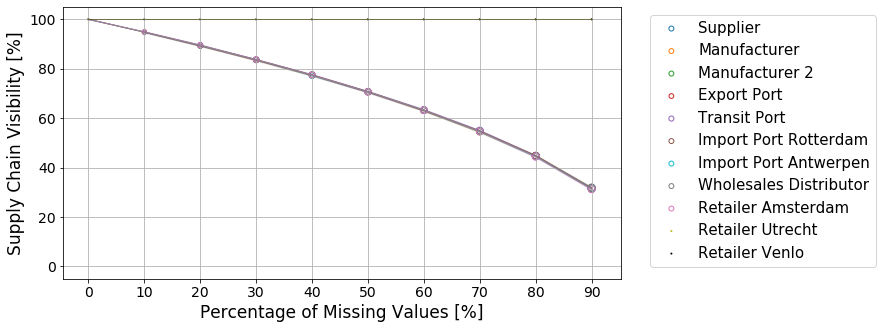

Noise Supplier [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Noise Supplier mean [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Noise Manufacturer [100.0, 95.91981118805066, 91.60346603031269, 87.18768061711575, 82.5212048180867, 77.61788455314553, 72.24278209800791, 66.37616696387452, 60.375177422894296, 53.317073787199845]
Noise Manufacturer mean [nan, 0.26169563239676563, 0.32352253875026804, 0.41364707276855484, 0.47557085701745905, 0.5611375791313549, 0.578568621883818, 0.6318116996734204, 0.735836276716725, 0.8549828824188239]
Noise Manufacturer_2 [100.0, 95.96428321644436, 91.72233321272779, 87.18928901459309, 82.44406161833969, 77.46829331430712, 72.1103996845035, 66.29874722326146, 60.261647294804874, 53.277815614962655]
Noise Manufacturer_2 mean [nan, 0.21667871894013047, 0.2986830160327827, 0.3798293658982459, 0.43289754381083867, 0.5016710705719163, 0.5620749985789928, 0.6444550465149916, 0.7099238271905648, 0.8557887658217425]
Noise Export_Port

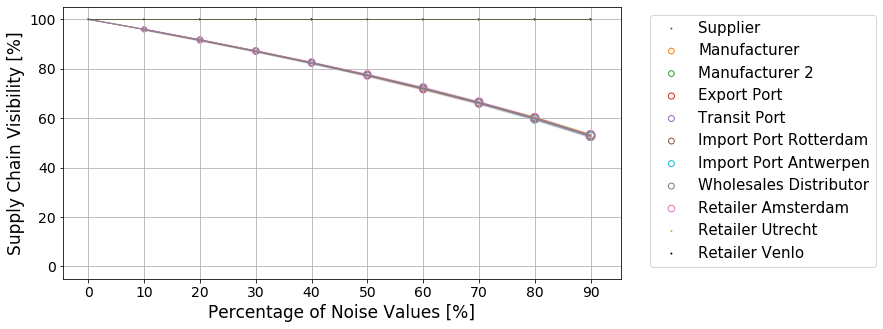

Bias Supplier [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Bias Supplier mean [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Bias Manufacturer [100.0, 98.61559926181071, 97.17283807513664, 95.73217880415106, 94.31156178708858, 92.7977757598953, 91.3124634007284, 89.87081921893902, 88.31573421567228, 86.77804440266118]
Bias Manufacturer mean [nan, 0.054463978011654035, 0.07917131911924002, 0.09836874653348104, 0.10900941308435108, 0.1324401667026791, 0.14443669654536961, 0.17210696587906682, 0.17822209723144056, 0.19717151679989797]
Bias Manufacturer_2 [100.0, 98.8621009484888, 97.68796651034765, 96.50723415838657, 95.32381788094695, 94.14573247801796, 92.94028445483103, 91.7314874598741, 90.45767806643596, 89.24724771711799]
Bias Manufacturer_2 mean [nan, 0.04653493298442868, 0.06643489128020974, 0.08879396316748966, 0.09520895965894738, 0.10800793859155533, 0.12055921601577779, 0.13792592159060746, 0.15077223183993738, 0.1549196496717684]
Bias Export_Port

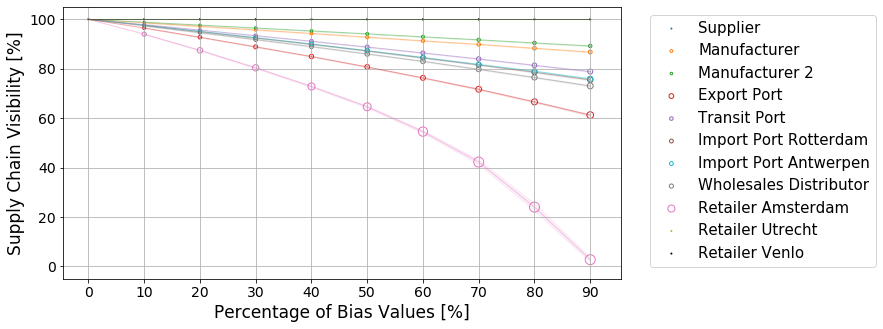

In [23]:
data_sparse_perc = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:cyan" , "tab:gray", "tab:pink", "tab:olive", "black"]

for dim, all_percentages in dim_node_perc.items():
    plt.figure(figsize=(10,5))
    plt.grid()
    
    for (name, all_perc), col in zip(all_percentages.items(), colors):
        mean = [np.mean(v[0]) for k,v in all_perc.items()]
        print(dim.title(), name, mean)
        
        #plt.plot(data_sparse_perc, mean, label=name.title().replace("_"," "), color=col)

        outcome_seeds = [v[0] for k,v in all_perc.items()]

        #Add confidence interval
        conf_seed = [st.t.interval(alpha=0.95, df=len(j)-1, loc=np.mean(j), scale=st.sem(j)) for j in outcome_seeds]
        min_interval = [interval[0]for interval in conf_seed]
        max_interval = [min(100, interval[1]) for interval in conf_seed]
        print(dim.title(), name, "mean", [m-n for m,n in zip(max_interval, min_interval)])
    
        
        min_error = [abs(i-j) for i,j in zip(min_interval, mean)]
        max_error = [max(1, abs(i-j)*150) for i,j in zip(max_interval, mean)]
        
        if name == "Retailer_Amsterdam" or name == "Wholesales_Distributor" or name == "Transit_Port" or name == "Import_Port_Rotterdam" or name == "Import_Port_Antwerpen" or name == "Export_Port":
            max_error = [min(100, abs(i-j)*150) for i,j in zip(max_interval, mean)]
    
    
        total_error = [min_error, max_error]
#         plt.errorbar(data_sparse_perc, mean, yerr=total_error, linestyle="none", marker='o',
#                  solid_capstyle='projecting', capsize=5,label=name.title().replace("_"," "))
        
        plt.scatter(data_sparse_perc, mean, label=name.title().replace("_"," "), s=max_error,  
                    facecolors='none', edgecolors=col)
        plt.plot(data_sparse_perc, mean, c=col, linewidth = 1, alpha=0.4)
        
        plt.fill_between(data_sparse_perc, min_interval, max_interval, alpha=0.1, color=col)

    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15)
    #plt.xlabel("Percentage of Data Sparseness [%]", fontsize = 17)
    plt.ylabel("Supply Chain Visibility [%]", fontsize = 17)
    plt.xlabel("Percentage of {0} [%]".format(dim.title()+ " Values"), fontsize = 17)
    plt.ylim((-5,105))
    #plt.title("Supply Chain Visibility per Node of "+ dim.title(), fontsize = 20)
    
    data_sparse_perc = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    ticks = [1,2,3,4,5,6,7,8,9,10]
    plt.xticks(data_sparse_perc, fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()